In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from functools import wraps
import time
import os
import seaborn as sns
from utils import *

In [2]:
data = load_data()

/home/jovyan/work/utils.py:22: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('dataset/data.csv')


Function load_data took 39.0136 seconds


In [3]:
data

productOrderId  bookingId bookingCode       timeOfPurchase  \
0               1147569     849369    11115NYD  2019-09-17 01:16:48   
1               1147570     849369    11115NYD  2019-09-17 01:16:48   
2                937167     688188    11116KMK  2018-11-30 20:20:14   
3               1704688    1313487    1111J3A4  2023-04-19 08:36:56   
4               1475144    1125054    1111QBSK  2022-04-21 05:38:39   
...                 ...        ...         ...                  ...   
1420351          308518     221083    ZZZM81DC  2016-05-18 08:17:24   
1420352         1654571    1272837    ZZZP77W7  2023-01-30 19:31:35   
1420353          815469     595489    ZZZVMBMC  2018-06-22 09:33:25   
1420354          815470     595489    ZZZVMBMC  2018-06-22 09:33:25   
1420355          831348     607703    ZZZW2KP5  2018-07-11 12:34:52   

        productType  numberOfCustomers  realNumberOfCustomers  price  \
0              OPTI                  2                    2.0   76.0   
1              OPTI                  2                    2.0   74.0   
2               FIX                  2                    2.0   18.0   
3              OPTI                  2                    2.0   60.0   
4               VIP                  2                    2.0  214.0   
...             ...                ...                    ...    ...   
1420351        OPTI                  3                    3.0   48.0   
1420352         FIX                  6                    6.0   78.0   
1420353        OPTI                  2                    2.0    0.0   
1420354        OPTI                  2                    2.0    0.0   
1420355        OPTI                  2                    2.0   38.0   

         stationToStationPrice    status  ... pickupDepartureAirportCode  \
0                         72.0   UNPAYED  ...                        NaN   
1                         70.0   UNPAYED  ...                        BCN   
2                         18.0    BOOKED  ...                        NaN   
3                         56.0   UPDATED  ...                        TFS   
4                        152.0    BOOKED  ...                        NaN   
...                        ...       ...  ...                        ...   
1420351                   48.0   UNPAYED  ...                        STN   
1420352                   78.0    BOOKED  ...                        NaN   
1420353                   30.0  CANCELED  ...                        NaN   
1420354                   30.0  CANCELED  ...                        CAG   
1420355                   38.0    BOOKED  ...                        NaN   

                 pickupDepartureLocation  pickupDepartureTime  \
0                                    NaN                  NaN   
1        Barcelona International Airport  2019-10-03 16:20:00   
2                                    NaN                  NaN   
3              Sur Reina Sofia, Tenerife  2023-05-15 14:40:00   
4                                 Berlin                  NaN   
...                                  ...                  ...   
1420351                         STANSTED  2016-05-21 12:40:00   
1420352                              NaN                  NaN   
1420353                              NaN                  NaN   
1420354                         CAGLIARI  2018-08-17 17:00:00   
1420355                              NaN                  NaN   

        dropoffFlightNumber dropoffArrivalAirportCode  \
0                    FR3141                       BCN   
1                       NaN                       NaN   
2                     JP108                       MUC   
3                       NaN                       NaN   
4                       NaN                       NaN   
...                     ...                       ...   
1420351                 NaN                       NaN   
1420352                 NaN                       NaN   
1420353              FR4827                       CAG   
1420354                 NaN

In [4]:
data.sample(5).T

1104091  \
productOrderId                                                         1201075   
bookingId                                                               890328   
bookingCode                                                           QN8827FD   
timeOfPurchase                                             2019-11-24 16:39:03   
productType                                                               OPTI   
numberOfCustomers                                                            1   
realNumberOfCustomers                                                      1.0   
price                                                                     36.0   
stationToStationPrice                                                     30.0   
status                                                                 UPDATED   
srcRouteName                                                               NaN   
srcSoonestPickup                                           2020-01-02 16:30:00   
srcLatestPickup                                            2020-01-02 18:30:00   
srcSoonestDropoff                                          2020-01-02 20:15:00   
srcLatestDropoff                                           2020-01-02 22:15:00   
windowTime                                                 1970-01-01 02:00:00   
timeWindowType                                                  SOONEST_PICKUP   
productId                                                                 1071   
productName                                                   Venice - Krk VAN   
productDirection                                                       INBOUND   
productStart                                         Venice port (cruise ship)   
productStartLatitude                                                   45.4387   
productStartLongitude                                                  12.3093   
productEnd                                                      Rijeka Airport   
productEndLatitude                                                       45.22   
productEndLongitude                                                    14.5722   
pickupPoint                  Zračna luka (TSF), Via Noalese, 63E, 31100, (P...   
pickupCity                                                             Treviso   
pickupCountry                                                          Italija   
pickupLatitude                                                         45.6552   
pickupLongitude                                                        12.2049   
dropoffPoint                 Šetalište maršala Tita 41, 51415 Lovran, Lovra...   
dropoffCity                                                             Lovran   
dropoffCountry                                                        Hrvatska   
dropoffLatitude                                                        45.2926   
dropoffLongitude                                                       14.2764   
pickupFlightNumber                                                      FR6055   
pickupArrivalAirportCode                                                   TSF   
pickupArrivalLocation                                            S. ANGELO MIL   
pickupArrivalTime                                          2020-01-02 15:40:00   
pickupDepartureAirportCode                                                 CRL   
pickupDepartureLocation                       Brussels South Charleroi Airport   
pickupDepartureTime                                        2020-01-02 14:05:00   
dropoffFlightNumber                                                        NaN   
dropoffArrivalAirportCode                                                  NaN   
dropoffArrivalLocation                                                     NaN   
dropoffArrivalTime                                                         NaN   
dropoffDepartureAirportCode                                                NaN   
dropoffDepartureLocation                             

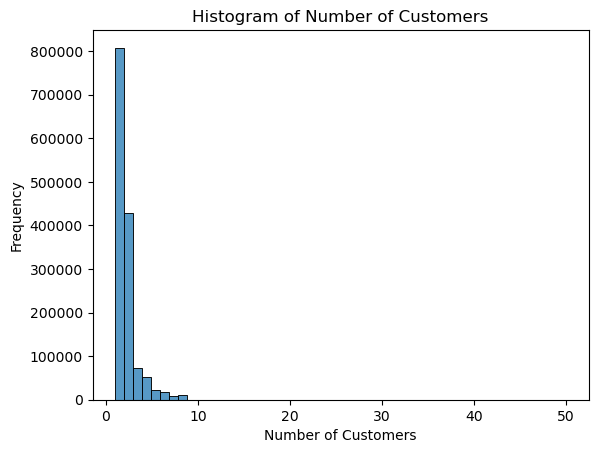

In [5]:
sns.histplot(data=data, x='numberOfCustomers', bins=50)  # Adjust the number of bins as needed
plt.xlabel('Number of Customers')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Customers')
plt.show()

/tmp/ipykernel_234457/2884270602.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
/tmp/ipykernel_234457/2884270602.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


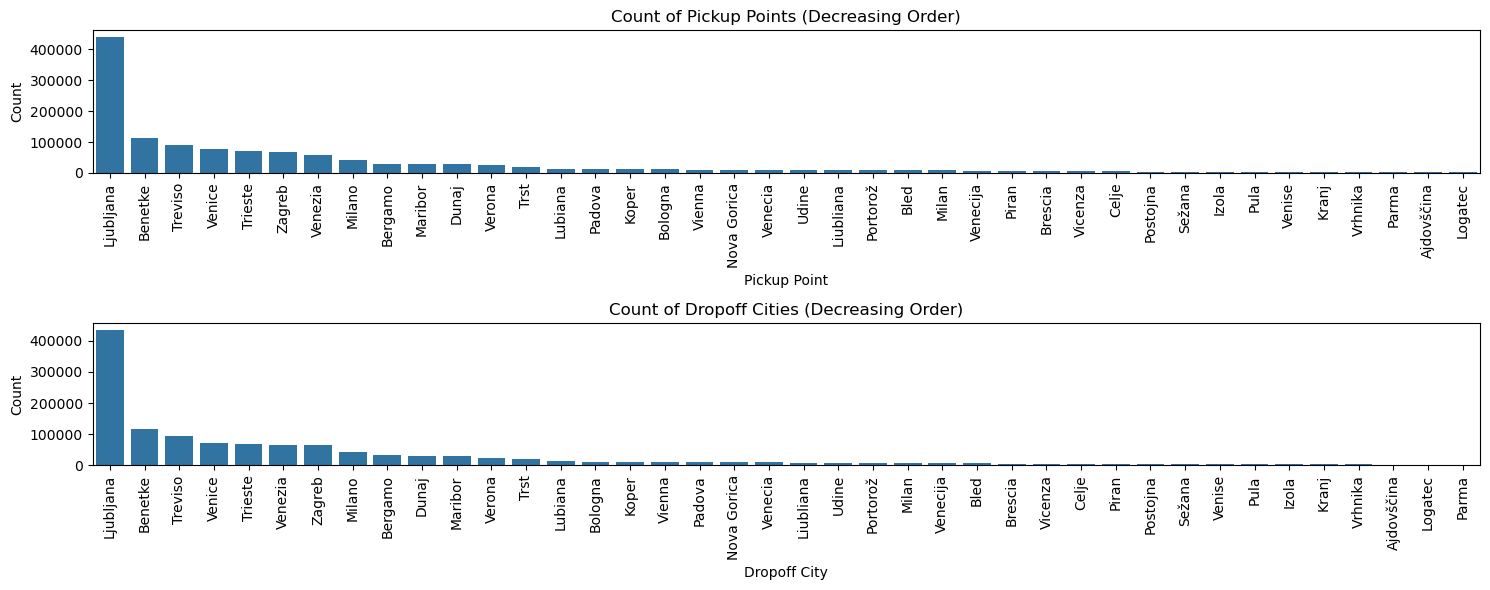

In [6]:
# Assuming you have a DataFrame named 'df' with columns 'pickupCity' and 'dropoffCity'
pickuppoint_counts = data['pickupCity'].value_counts().head(40)
dropoffCity_counts = data['dropoffCity'].value_counts().head(40)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 6))

# Subplot 1: Pickup City
sns.barplot(x=pickuppoint_counts.index, y=pickuppoint_counts.values, order=pickuppoint_counts.index, ax=ax1)
ax1.set_xlabel('Pickup Point')
ax1.set_ylabel('Count')
ax1.set_title('Count of Pickup Points (Decreasing Order)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Subplot 2: Dropoff City
sns.barplot(x=dropoffCity_counts.index, y=dropoffCity_counts.values, order=dropoffCity_counts.index, ax=ax2)
ax2.set_xlabel('Dropoff City')
ax2.set_ylabel('Count')
ax2.set_title('Count of Dropoff Cities (Decreasing Order)')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

# Adjust the space between subplots
plt.tight_layout()

# Show the figure
plt.show()

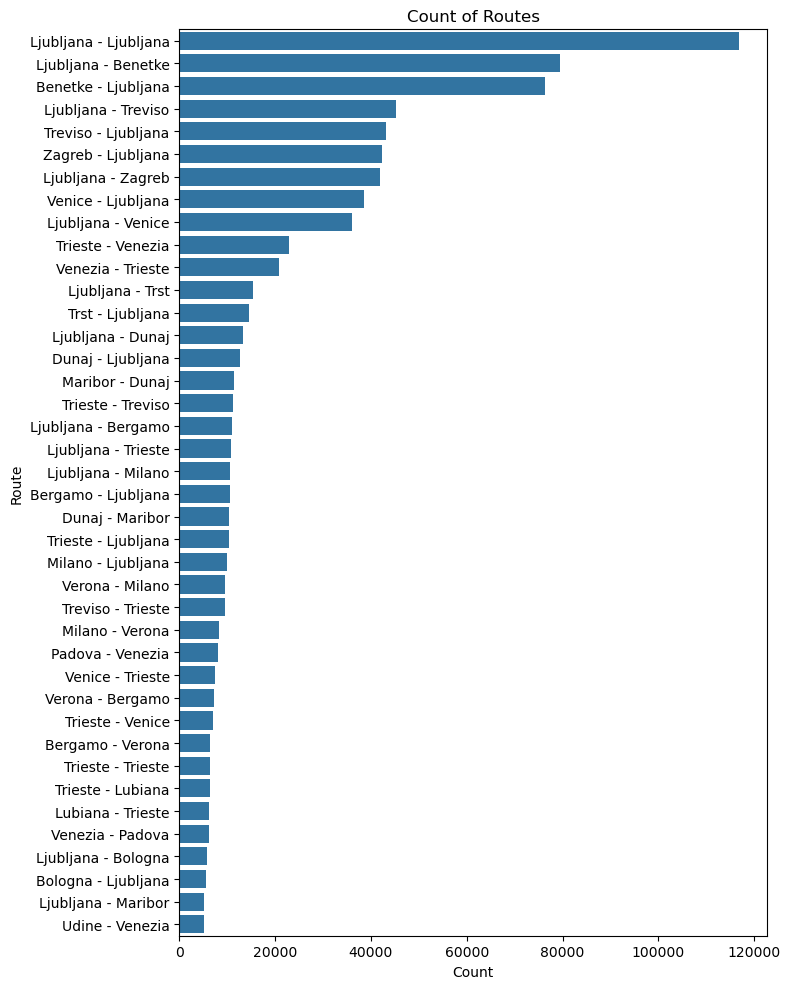

In [7]:
data['route'] = data['pickupCity'] + ' - ' + data['dropoffCity']

# Calculate the frequency of the new 'route' column
route_counts = data['route'].value_counts().head(40)

# Create a bar plot for the frequency of routes
plt.figure(figsize=(8, 10))  # Adjust the figure size if needed
sns.barplot(x=route_counts.values, y=route_counts.index)
plt.xlabel('Count')
plt.ylabel('Route')
plt.title('Count of Routes')
plt.tight_layout()
plt.savefig(f'figures/routes.pdf', bbox_inches='tight', pad_inches=0)

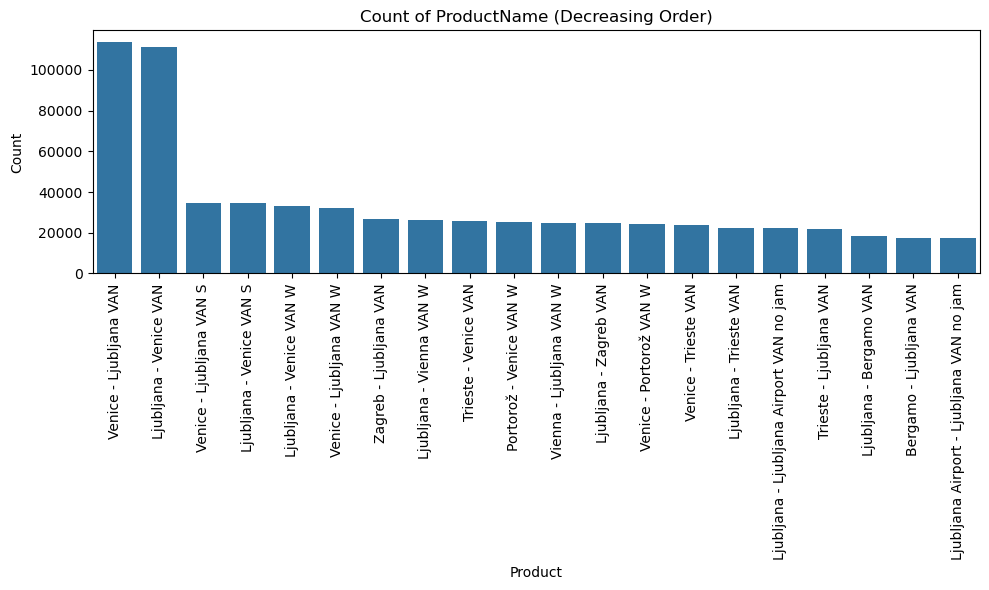

In [8]:
dropoffCity_counts = data['productName'].value_counts()

# Create a bar plot in decreasing order using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
dropoffCity_counts = dropoffCity_counts.head(20)
sns.barplot(x=dropoffCity_counts.index, y=dropoffCity_counts.values, order=dropoffCity_counts.index)
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Count of ProductName (Decreasing Order)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.savefig(f'figures/products.pdf', bbox_inches='tight', pad_inches=0)

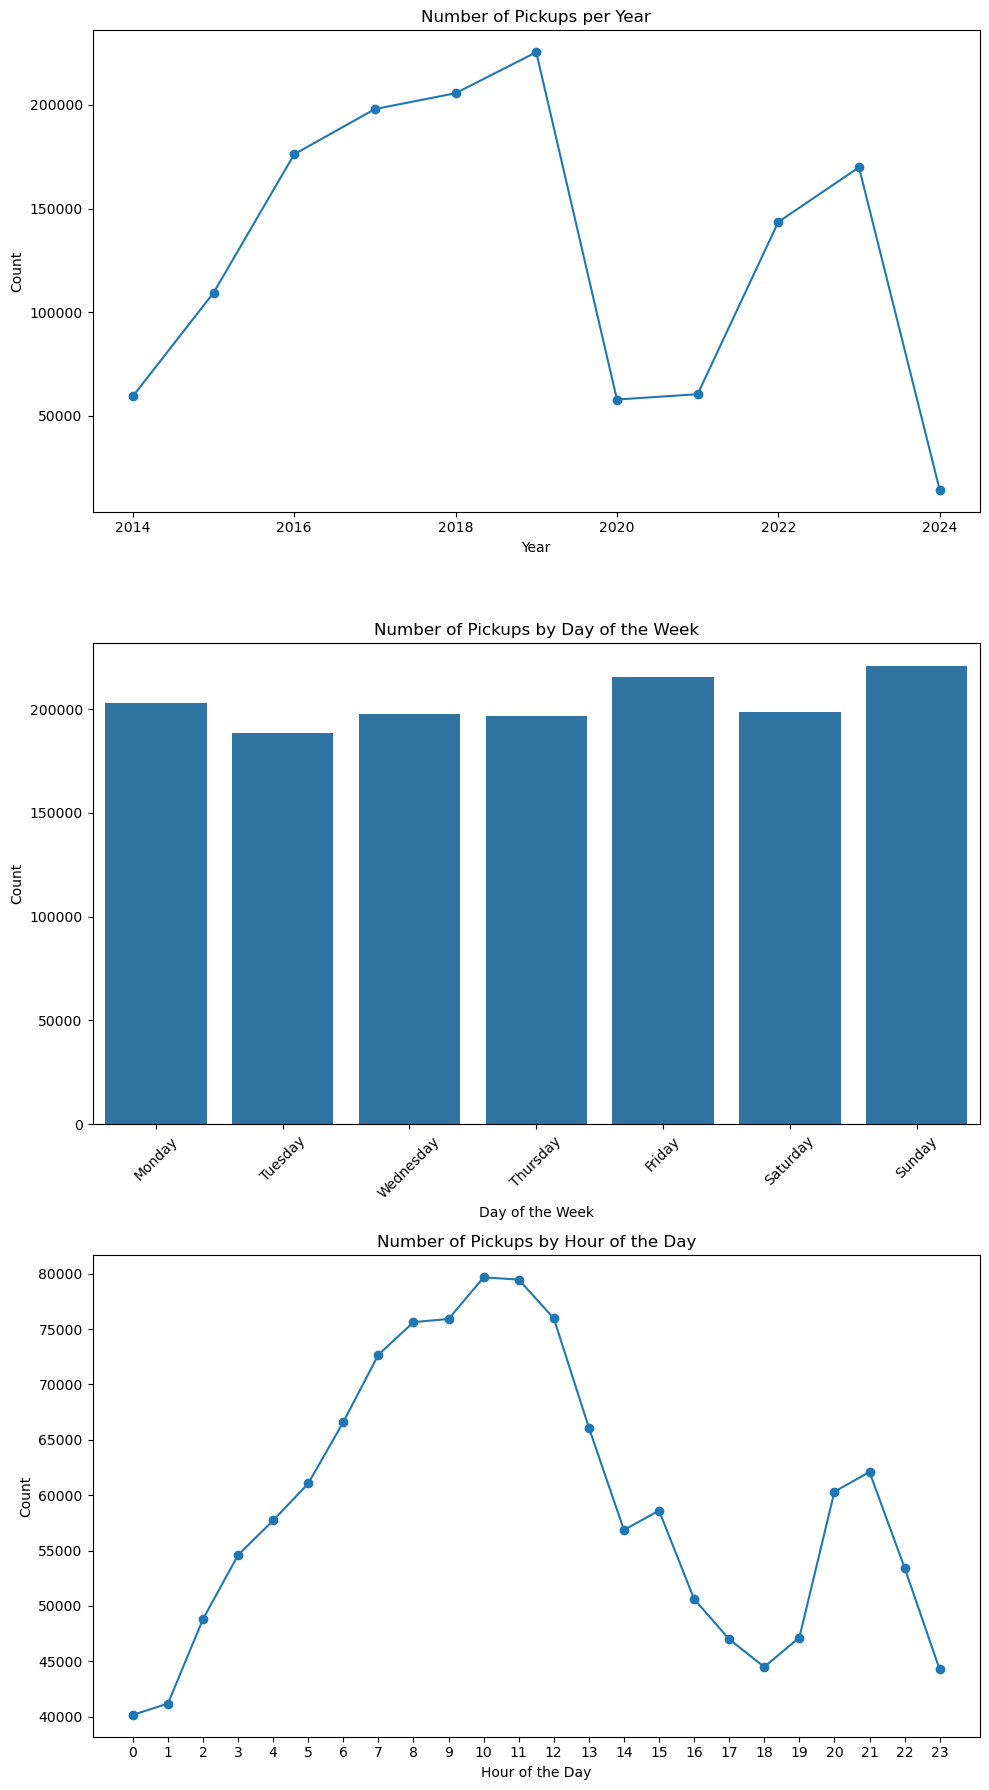

In [9]:
data['Year'] = data['srcSoonestPickup'].dt.year
data['DayOfWeek'] = data['srcSoonestPickup'].dt.day_name()
data['HourOfDay'] = data['srcSoonestPickup'].dt.hour

# Create a single figure with three subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Yearly Analysis
yearly_counts = data['Year'].value_counts().sort_index()
axes[0].plot(yearly_counts.index, yearly_counts.values, marker='o')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Count')
axes[0].set_title('Number of Pickups per Year')

# Day of the Week Analysis
day_of_week_counts = data['DayOfWeek'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values, ax=axes[1])
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Count')
axes[1].set_title('Number of Pickups by Day of the Week')
axes[1].tick_params(axis='x', rotation=45)

# Hour of the Day Analysis
hour_of_day_counts = data['HourOfDay'].value_counts().sort_index()
axes[2].plot(hour_of_day_counts.index, hour_of_day_counts.values, marker='o')
axes[2].set_xlabel('Hour of the Day')
axes[2].set_ylabel('Count')
axes[2].set_title('Number of Pickups by Hour of the Day')
axes[2].set_xticks(range(24))

# Adjust space between subplots
plt.tight_layout()

# Show the combined plot
plt.show()


In [14]:
data.dropoffLatitude

0          45.5054
1          44.8577
2          46.2312
3          46.0917
4          45.4483
            ...   
1420351    46.0577
1420352    45.6556
1420353    45.6552
1420354    45.7886
1420355    46.2312
Name: dropoffLatitude, Length: 1420356, dtype: float64

In [16]:
data.dropoffLatitude.dropna()

0          45.5054
1          44.8577
2          46.2312
3          46.0917
4          45.4483
            ...   
1420351    46.0577
1420352    45.6556
1420353    45.6552
1420354    45.7886
1420355    46.2312
Name: dropoffLatitude, Length: 1420356, dtype: float64

In [10]:
sorted([str(x) for x in list(data.pickupCity.unique()) if 'ljub' in str(x).lower()])

[' 1000 Ljubljana',
 ' 1260 Ljubljana - Polje',
 '1000 Ljubljana',
 'Brezovica pri Ljubljani',
 'Dol pri Ljubljani',
 'LJUBLJANA - ŠMARTNO',
 'Laibach/Ljubljana',
 'Ljubečna',
 'Ljubljan a',
 'Ljubljana',
 'Ljubljana - Dobrunje',
 'Ljubljana - Polje',
 'Ljubljana - Črnuče',
 'Ljubljana - Šentvid',
 'Ljubljana - Šmartno',
 'Ljubljana črnuče',
 'Ljubno',
 'Ljubno ob Savinji']

In [11]:
sorted([str(x) for x in list(data.pickupCity.unique()) if 'laib' in str(x).lower()])

['Flaibano', 'Laibach', 'Laibach/Ljubljana']

In [12]:
# tipi produktov v bazi za Ljubljano
[x for x in list(data.productName.unique()) if 'Ljubljana' in x and 'Ven' in x]

['Venice - Ljubljana VAN S',
 'Ljubljana - Venice VAN W',
 'Ljubljana - Venice VAN',
 'Venice - Ljubljana VAN',
 'Venice - Ljubljana VAN W',
 'Venice - Ljubljana VAN FIX Ananas sep&okt',
 'Ljubljana - Venice VAN FIX Ananas od nov dalj',
 'Ljubljana - Venice VAN S',
 'Ljubljana - Venice VAN FIX Ananas sep&okt',
 'Ljubljana - Venice VAN FIX december',
 'Ljubljana - Venice VAN FIX julij',
 'Venice - Ljubljana VAN FIX 1.11.-31.3.19 mid',
 'Ljubljana - Venice VAN FIX 1.11.-31.3.19 high',
 'Venice - Ljubljana VAN FIX februar',
 'Ljubljana - Venice VAN FIX Ananas avgust',
 'Ljubljana - Venice VAN FIX Ananas december',
 'Ljubljana - Venice VAN FIX Ananas julij',
 'Venice - Ljubljana VAN FIX Ananas november',
 'Venice - Ljubljana VAN FIX Ananas od nov dalj',
 'Venice - Ljubljana VAN FIX september',
 'Ljubljana - Venice VAN FIX 1.11.-31.3.19 low',
 'Ljubljana - Venice VAN FIX 1.4. - 31.5.2019',
 'Ljubljana - Venice VAN FIX 1.11.-31.3.19 mid',
 'Ljubljana - Venice VAN FIX november',
 'Ljubljana -

In [17]:
data

productOrderId  bookingId bookingCode       timeOfPurchase  \
0               1147569     849369    11115NYD  2019-09-17 01:16:48   
1               1147570     849369    11115NYD  2019-09-17 01:16:48   
2                937167     688188    11116KMK  2018-11-30 20:20:14   
3               1704688    1313487    1111J3A4  2023-04-19 08:36:56   
4               1475144    1125054    1111QBSK  2022-04-21 05:38:39   
...                 ...        ...         ...                  ...   
1420351          308518     221083    ZZZM81DC  2016-05-18 08:17:24   
1420352         1654571    1272837    ZZZP77W7  2023-01-30 19:31:35   
1420353          815469     595489    ZZZVMBMC  2018-06-22 09:33:25   
1420354          815470     595489    ZZZVMBMC  2018-06-22 09:33:25   
1420355          831348     607703    ZZZW2KP5  2018-07-11 12:34:52   

        productType  numberOfCustomers  realNumberOfCustomers  price  \
0              OPTI                  2                    2.0   76.0   
1              OPTI                  2                    2.0   74.0   
2               FIX                  2                    2.0   18.0   
3              OPTI                  2                    2.0   60.0   
4               VIP                  2                    2.0  214.0   
...             ...                ...                    ...    ...   
1420351        OPTI                  3                    3.0   48.0   
1420352         FIX                  6                    6.0   78.0   
1420353        OPTI                  2                    2.0    0.0   
1420354        OPTI                  2                    2.0    0.0   
1420355        OPTI                  2                    2.0   38.0   

         stationToStationPrice    status  ... dropoffArrivalAirportCode  \
0                         72.0   UNPAYED  ...                       BCN   
1                         70.0   UNPAYED  ...                       NaN   
2                         18.0    BOOKED  ...                       MUC   
3                         56.0   UPDATED  ...                       NaN   
4                        152.0    BOOKED  ...                       NaN   
...                        ...       ...  ...                       ...   
1420351                   48.0   UNPAYED  ...                       NaN   
1420352                   78.0    BOOKED  ...                       NaN   
1420353                   30.0  CANCELED  ...                       CAG   
1420354                   30.0  CANCELED  ...                       NaN   
1420355                   38.0    BOOKED  ...                       IST   

                  dropoffArrivalLocation   dropoffArrivalTime  \
0        Barcelona International Airport  2019-09-24 10:30:00   
1                                    NaN                  NaN   
2           Munich International Airport  2018-12-01 17:00:00   
3                                    NaN                  NaN   
4                                    NaN                  NaN   
...                                  ...                  ...   
1420351                              NaN                  NaN   
1420352                              NaN                  NaN   
1420353                         CAGLIARI  2018-08-07 12:00:00   
1420354                              NaN                  NaN   
1420355                          ATATURK  2018-07-14 20:20:00   

        dropoffDepartureAirportCode dropoffDepartureLocation  \
0                               VCE        VENEZIA/SANNICOLO   
1                               NaN                      NaN   
2                               LJU                LJUBLJANA   
3                               NaN                      NaN   
4                               NaN                      NaN   
...                             ...                      ...   
1420351                         NaN                      NaN   
1420352                         NaN                      NaN   
1420353                         T

In [21]:
4.8 + 2.23 + 2.7 + 1.06 + 4.21

15.0

In [22]:
4.6+ 2.6+ 2.39+ 1.2+ 4.21

15.0